In [18]:
from analyze_experiment_in_progress import get_data_from_logs
from matplotlib import pyplot as plt
import seaborn
import numpy as np

seaborn.set()

In [19]:
data = get_data_from_logs("./results/ml_benchmark20m_2021_12_08T07_39_20/stdout", 0)

In [20]:
def get_metric(metric_history, metric_name):
    result = []
    for item in metric_history:
        try:
            result.append(item[metric_name])
        except:
            print(item)
    return np.array(result)

In [29]:
experiment_num = 0
lambdarank_lambdas_len = get_metric(data[experiment_num]['metrics_history'], "lambdarank_lambdas_len")
bce_lambdas_len = get_metric(data[experiment_num]['metrics_history'], "bce_lambdas_len")*100
val_ndcg = get_metric(data[experiment_num]['metrics_history'], "val_ndcg")

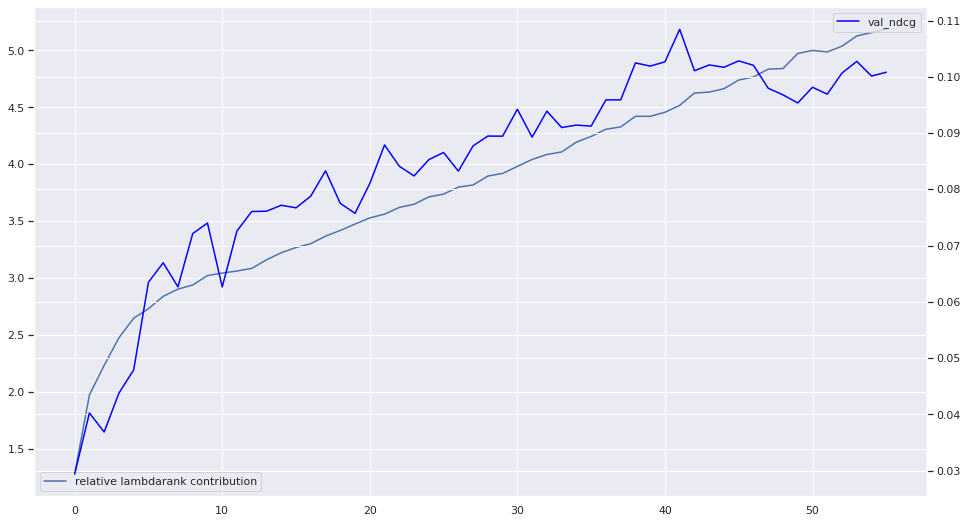

In [41]:
plt.figure(figsize=(16, 9))
#lt.plot(lambdarank_lambdas_len[0:], color='green', label='lambdarank_lambdas')
#lt.plot(bce_lambdas_len[0:], color='red', label='bce_lambdas; 100x')

plt.plot(lambdarank_lambdas_len/bce_lambdas_len, label='relative lambdarank contribution')
plt.legend(loc='lower left')


ax2 = plt.twinx()
ax2.plot(val_ndcg, color='blue', label='val_ndcg')

ax2.legend()